In [342]:
import os
import gensim
import time
# Set file names for train and test data
test_data_dir = os.path.join(gensim.__path__[0], 'test', 'test_data')
lee_train_file = os.path.join(test_data_dir, 'lee_background.cor')
lee_test_file = os.path.join(test_data_dir, 'lee.cor')

In [343]:
import numpy as np 

def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

def filter(document):
        # Filter out components that are not needed 
    i = 0
    df = None
    noun_list = []
    while i < len(document):
        
        # Convert list of strings to natural language
#         while 'A' in document[i]: document[i].remove('A')
#         while 'start' in document[i]: document[i].remove('start')
#         while 'end' in document[i]: document[i].remove('end')
#         while '>' in document[i]: document[i].remove('>')
#         while '<' in document[i]: document[i].remove('<')
        noun_str = ''.join(document[i])
        noun_list = [*noun_list, noun_str]
        
        i += 1
    return noun_list
a = ['skateboarder trick skateboard ramp',
 'person air skis',
 'wood door boards',
 'Do Enter sign road stadium',
 'Small child chair plate',
 'groups people toilet area',
 'hand cellphone',
 'People computers student room',
 'birds field',
 'man cell phone park',
 'group men table microphones speech',
 'bathroom toilet sprayer wall',
 'woman bench phone',
 'woman clock purse market',
 'surfer hand signal',
 'cat asphalt',
 'carrots cut squash carrots',
 'Traffic lights intersection world',
 'man goatee backseat vehicle luggage',
 'street sign intersection Beacon Ave Stevens St.',
 'kid skateboard kid',
 'apple clock display',
 'bunch color watches table',
 'man suit standing front stove',
 'Pizzas sauce cheese table',
 'variety vegetables sticks tray control',
 'bus road driver',
 'pizza cut pieces top counter',
 'plate breakfast food eggs toast hash browns',
 'transit bus lot',
 'man air skateboard',
 'ground plane',
 'person bananas back',
 'Three zebras field grass',
 'couple pieces toast cup syrup',
 'Many dishes people',
 'herd wire fence',
 'slice pizza cheese crust',
 'herd cows field',
 'paper plate dog sandwich cream cheese',
 'baby boy room baby doll',
 'man woman tennis rackets court',
 'bus side man storage bus']



In [344]:
def read_corpus(f, tokens_only=False):
#     print(f)
    for i, line in enumerate(f):
        tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])
r = list(read_corpus(filter(a)))
a = list(read_corpus(filter(a), tokens_only=True))

print(r)
# print(a)


[TaggedDocument(words=['skateboarder', 'trick', 'skateboard', 'ramp'], tags=[0]), TaggedDocument(words=['person', 'air', 'skis'], tags=[1]), TaggedDocument(words=['wood', 'door', 'boards'], tags=[2]), TaggedDocument(words=['do', 'enter', 'sign', 'road', 'stadium'], tags=[3]), TaggedDocument(words=['small', 'child', 'chair', 'plate'], tags=[4]), TaggedDocument(words=['groups', 'people', 'toilet', 'area'], tags=[5]), TaggedDocument(words=['hand', 'cellphone'], tags=[6]), TaggedDocument(words=['people', 'computers', 'student', 'room'], tags=[7]), TaggedDocument(words=['birds', 'field'], tags=[8]), TaggedDocument(words=['man', 'cell', 'phone', 'park'], tags=[9]), TaggedDocument(words=['group', 'men', 'table', 'microphones', 'speech'], tags=[10]), TaggedDocument(words=['bathroom', 'toilet', 'sprayer', 'wall'], tags=[11]), TaggedDocument(words=['woman', 'bench', 'phone'], tags=[12]), TaggedDocument(words=['woman', 'clock', 'purse', 'market'], tags=[13]), TaggedDocument(words=['surfer', 'hand

In [345]:
# model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

import multiprocessing 

cores = multiprocessing.cpu_count() # Count the number of cores in a computer

# w2v_model = Doc2Vec(min_count=20,
#                      window=2,
#                      size=300,
#                      sample=6e-5, 
#                      alpha=0.03, 
#                      min_alpha=0.0007, 
#                      negative=20,
#                      workers=cores-1)

model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40,  
                                      workers=cores-1)

In [346]:


t = time.time()

model.build_vocab(r, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time.time() - t) / 60, 2)))


Time to build vocab: 0.0 mins


In [347]:

model.train(r, total_examples=model.corpus_count, epochs=model.epochs)

print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to train the model: 0.04 mins


In [348]:
vector = model.infer_vector(['only', 'you'])
print(vector)

[ 9.2339795e-03  5.5544190e-03  9.2203671e-04  5.1273340e-03
  8.8215759e-03 -6.4809807e-03 -7.6325331e-03 -8.0525271e-05
 -2.0110351e-03  1.3126152e-03 -5.2263886e-03 -4.3702321e-03
  9.6780108e-03 -6.4570140e-03 -1.6096502e-03 -5.3235772e-03
  1.7050403e-03 -1.2699522e-03 -7.4769999e-03 -2.7769834e-03
  5.8344514e-03  9.3286512e-03 -7.1499320e-03 -9.5871305e-03
  3.4184933e-03  5.0515425e-03 -7.6746522e-03 -3.3546770e-03
 -3.6045696e-04  7.1386131e-03  1.3557952e-03 -1.4396709e-03
 -7.4540498e-03 -7.7685160e-03 -1.7472230e-03 -8.5792299e-03
 -2.3522419e-03  3.0952436e-03 -5.5612861e-03  4.5095109e-03
  9.2417086e-03 -5.5084899e-03 -6.1000376e-03  9.7689405e-03
 -6.0386080e-03 -3.1133282e-03 -3.4274673e-03  2.3015474e-04
  2.2461531e-03 -3.2637829e-03]


Compare cos sim, pca, confusion matrix.

In [339]:
# Model assesssment ##

In [351]:
# ranks = []
# second_ranks = []
# for doc_id in range(len(r)):
#     inferred_vector = model.infer_vector(r[doc_id].words)
#     sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
#     rank = [docid for docid, sim in sims].index(doc_id)
#     ranks.append(rank)

#     second_ranks.append(sims[1])

In [352]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({15: 3, 42: 3, 37: 3, 2: 2, 13: 2, 18: 2, 1: 2, 16: 2, 23: 2, 22: 2, 31: 2, 19: 2, 33: 2, 30: 1, 21: 1, 10: 1, 35: 1, 3: 1, 29: 1, 11: 1, 26: 1, 0: 1, 17: 1, 39: 1, 6: 1, 25: 1, 28: 1})


Testing the Model

Using the same approach above, we’ll infer the vector for a randomly chosen test document, and compare the docum
ent to our model by eye.

In [362]:
import os
import gensim
# Set file names for train and test data
test_data_dir = os.path.join(gensim.__path__[0], 'test', 'test_data')
lee_train_file = os.path.join(test_data_dir, 'lee_background.cor')
lee_test_file = os.path.join(test_data_dir, 'lee.cor')

In [364]:
import smart_open

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(lee_train_file))
test_corpus = list(read_corpus(lee_test_file, tokens_only=True))

In [365]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)


print()

[TaggedDocument(words=['hundreds', 'of', 'people', 'have', 'been', 'forced', 'to', 'vacate', 'their', 'homes', 'in', 'the', 'southern', 'highlands', 'of', 'new', 'south', 'wales', 'as', 'strong', 'winds', 'today', 'pushed', 'huge', 'bushfire', 'towards', 'the', 'town', 'of', 'hill', 'top', 'new', 'blaze', 'near', 'goulburn', 'south', 'west', 'of', 'sydney', 'has', 'forced', 'the', 'closure', 'of', 'the', 'hume', 'highway', 'at', 'about', 'pm', 'aedt', 'marked', 'deterioration', 'in', 'the', 'weather', 'as', 'storm', 'cell', 'moved', 'east', 'across', 'the', 'blue', 'mountains', 'forced', 'authorities', 'to', 'make', 'decision', 'to', 'evacuate', 'people', 'from', 'homes', 'in', 'outlying', 'streets', 'at', 'hill', 'top', 'in', 'the', 'new', 'south', 'wales', 'southern', 'highlands', 'an', 'estimated', 'residents', 'have', 'left', 'their', 'homes', 'for', 'nearby', 'mittagong', 'the', 'new', 'south', 'wales', 'rural', 'fire', 'service', 'says', 'the', 'weather', 'conditions', 'which', '

In [357]:
vector = model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
print(vector)

[-0.03567487 -0.37313637 -0.01083721  0.13866018  0.06192736 -0.05318422
  0.02757206 -0.0281425  -0.3055095   0.1078803   0.193058    0.2159933
  0.03837313  0.04720196 -0.17370375  0.13735114 -0.19151755 -0.15875909
  0.11822034 -0.27452555 -0.2728267  -0.09188554  0.22234504  0.07996361
 -0.20784375 -0.0717333   0.09482321 -0.14126007 -0.26776916  0.01465073
 -0.05738613  0.1412999   0.01143035 -0.12783949  0.14017604  0.24174024
  0.20423883  0.15281807 -0.24283563  0.00621133 -0.06237311  0.00046025
  0.1736172   0.03351888 -0.20936106  0.03810054  0.26740938 -0.01902256
  0.10002656 -0.04422643]


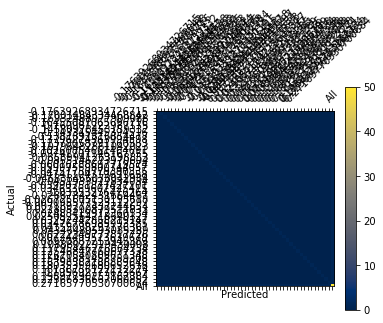

In [379]:

import pandas as pd
y_actu = pd.Series(vector, name='Actual')
y_pred = pd.Series(vector, name='Predicted')

df_confusion = pd.crosstab(y_actu, y_pred)

df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

df_conf_norm = df_confusion / df_confusion.sum(axis=1)


import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.cividis):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)